# Elenco Direttori Sportivi (gare regionali)
```
!pip install fpdf
!pip install kaleido
!pip install dataframe_image
!pip install pandas
```

In [114]:
import fpdf
from fpdf import FPDF

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi


# Da modificare
dir_iscritti = "data/Coda_160828.xls"

TITLE       = "ELENCO DIRETTORI SPORTIVI"
LOCATION    = "San Marino di Carpi (MO)"
DATE        = "02/10/22"
FILENAME    = "1001_SMCarpi_AL"


# Elenco iscritti esportato in .csv
df = pd.read_excel(dir_iscritti)

team        = df["NomeSocieta"].unique()
idGara      = df["IdGara"][0]
nomeGara    = df["NomeGara"][0]
categoria   = df["Categoria"][0]
N           = len(team)

teamName      = "Team (# {:d})".format(N)
df            = pd.DataFrame(columns=["Nome","Tessera",teamName,"Cellulare"])
df[teamName]  = team
df[teamName]  = df[teamName].str.slice(0,30)
df["Nome"]    = ["      "]*N
df.fillna('', inplace=True)

In [124]:
df = pd.read_excel(dir_iscritti)
(df["Categoria"]=="AL").sum()

df[df["Categoria"]=="JU"]

,IdGara,NomeGara,NomeTesserato,Categoria,CodiceSocieta,NomeSocieta,EMailSocieta,Accodamento,Riserva,Nazionalità,DataNascita
28,160828,TROFEO < PAOLO SGARBANTI >,BERETTI GIORGIO,JU,07N0302,S.C. CAVRIAGO,INFO@CICLISTICACAVRIAGO.IT,2022-09-19 10:48:44,NO,ITA,02/11/2005
57,160828,TROFEO < PAOLO SGARBANTI >,BOLDINI MICHELE,JU,02V3380,S. C. MINCIO-CHIESE A.S.D,MINCIO-CHIESE@ALICE.IT,2022-09-18 17:50:28,NO,ITA,27/05/2005
58,160828,TROFEO < PAOLO SGARBANTI >,APOSTOL DENIS,JU,02V3380,S. C. MINCIO-CHIESE A.S.D,MINCIO-CHIESE@ALICE.IT,2022-09-18 17:50:28,NO,ITA,26/10/2005
67,160828,TROFEO < PAOLO SGARBANTI >,FABRIS LUCA,JU,03J0012,A.S.D. S.C. PADOVANI,ASDPADOVANI@GMAIL.COM,2022-09-18 05:08:56,NO,ITA,21/03/2005
104,160828,TROFEO < PAOLO SGARBANTI >,SIRACUSA RICCARDO,JU,07L0149,A.S.D. S.C. CERETOLESE 1969,CERETOLESE@LIBERO.IT,2022-09-27 15:20:19,NO,ITA,21/08/2005
105,160828,TROFEO < PAOLO SGARBANTI >,POZZI DILIP,JU,07L0149,A.S.D. S.C. CERETOLESE 1969,CERETOLESE@LIBERO.IT,2022-09-27 15:20:19,NO,ITA,20/04/2005
106,160828,TROFEO < PAOLO SGARBANTI >,SAVIGNI ANDREA,JU,07L0149,A.S.D. S.C. CERETOLESE 1969,CERETOLESE@LIBERO.IT,2022-09-27 15:20:19,NO,ITA,01/06/2005
126,160828,TROFEO < PAOLO SGARBANTI >,PAULETTO DENIS,JU,07B0236,G.S. S.MARIA CODIFIUME,G.S.CODIFIUME@GMAIL.COM,2022-09-17 10:36:09,NO,ITA,21/11/2005


## Genera tabella

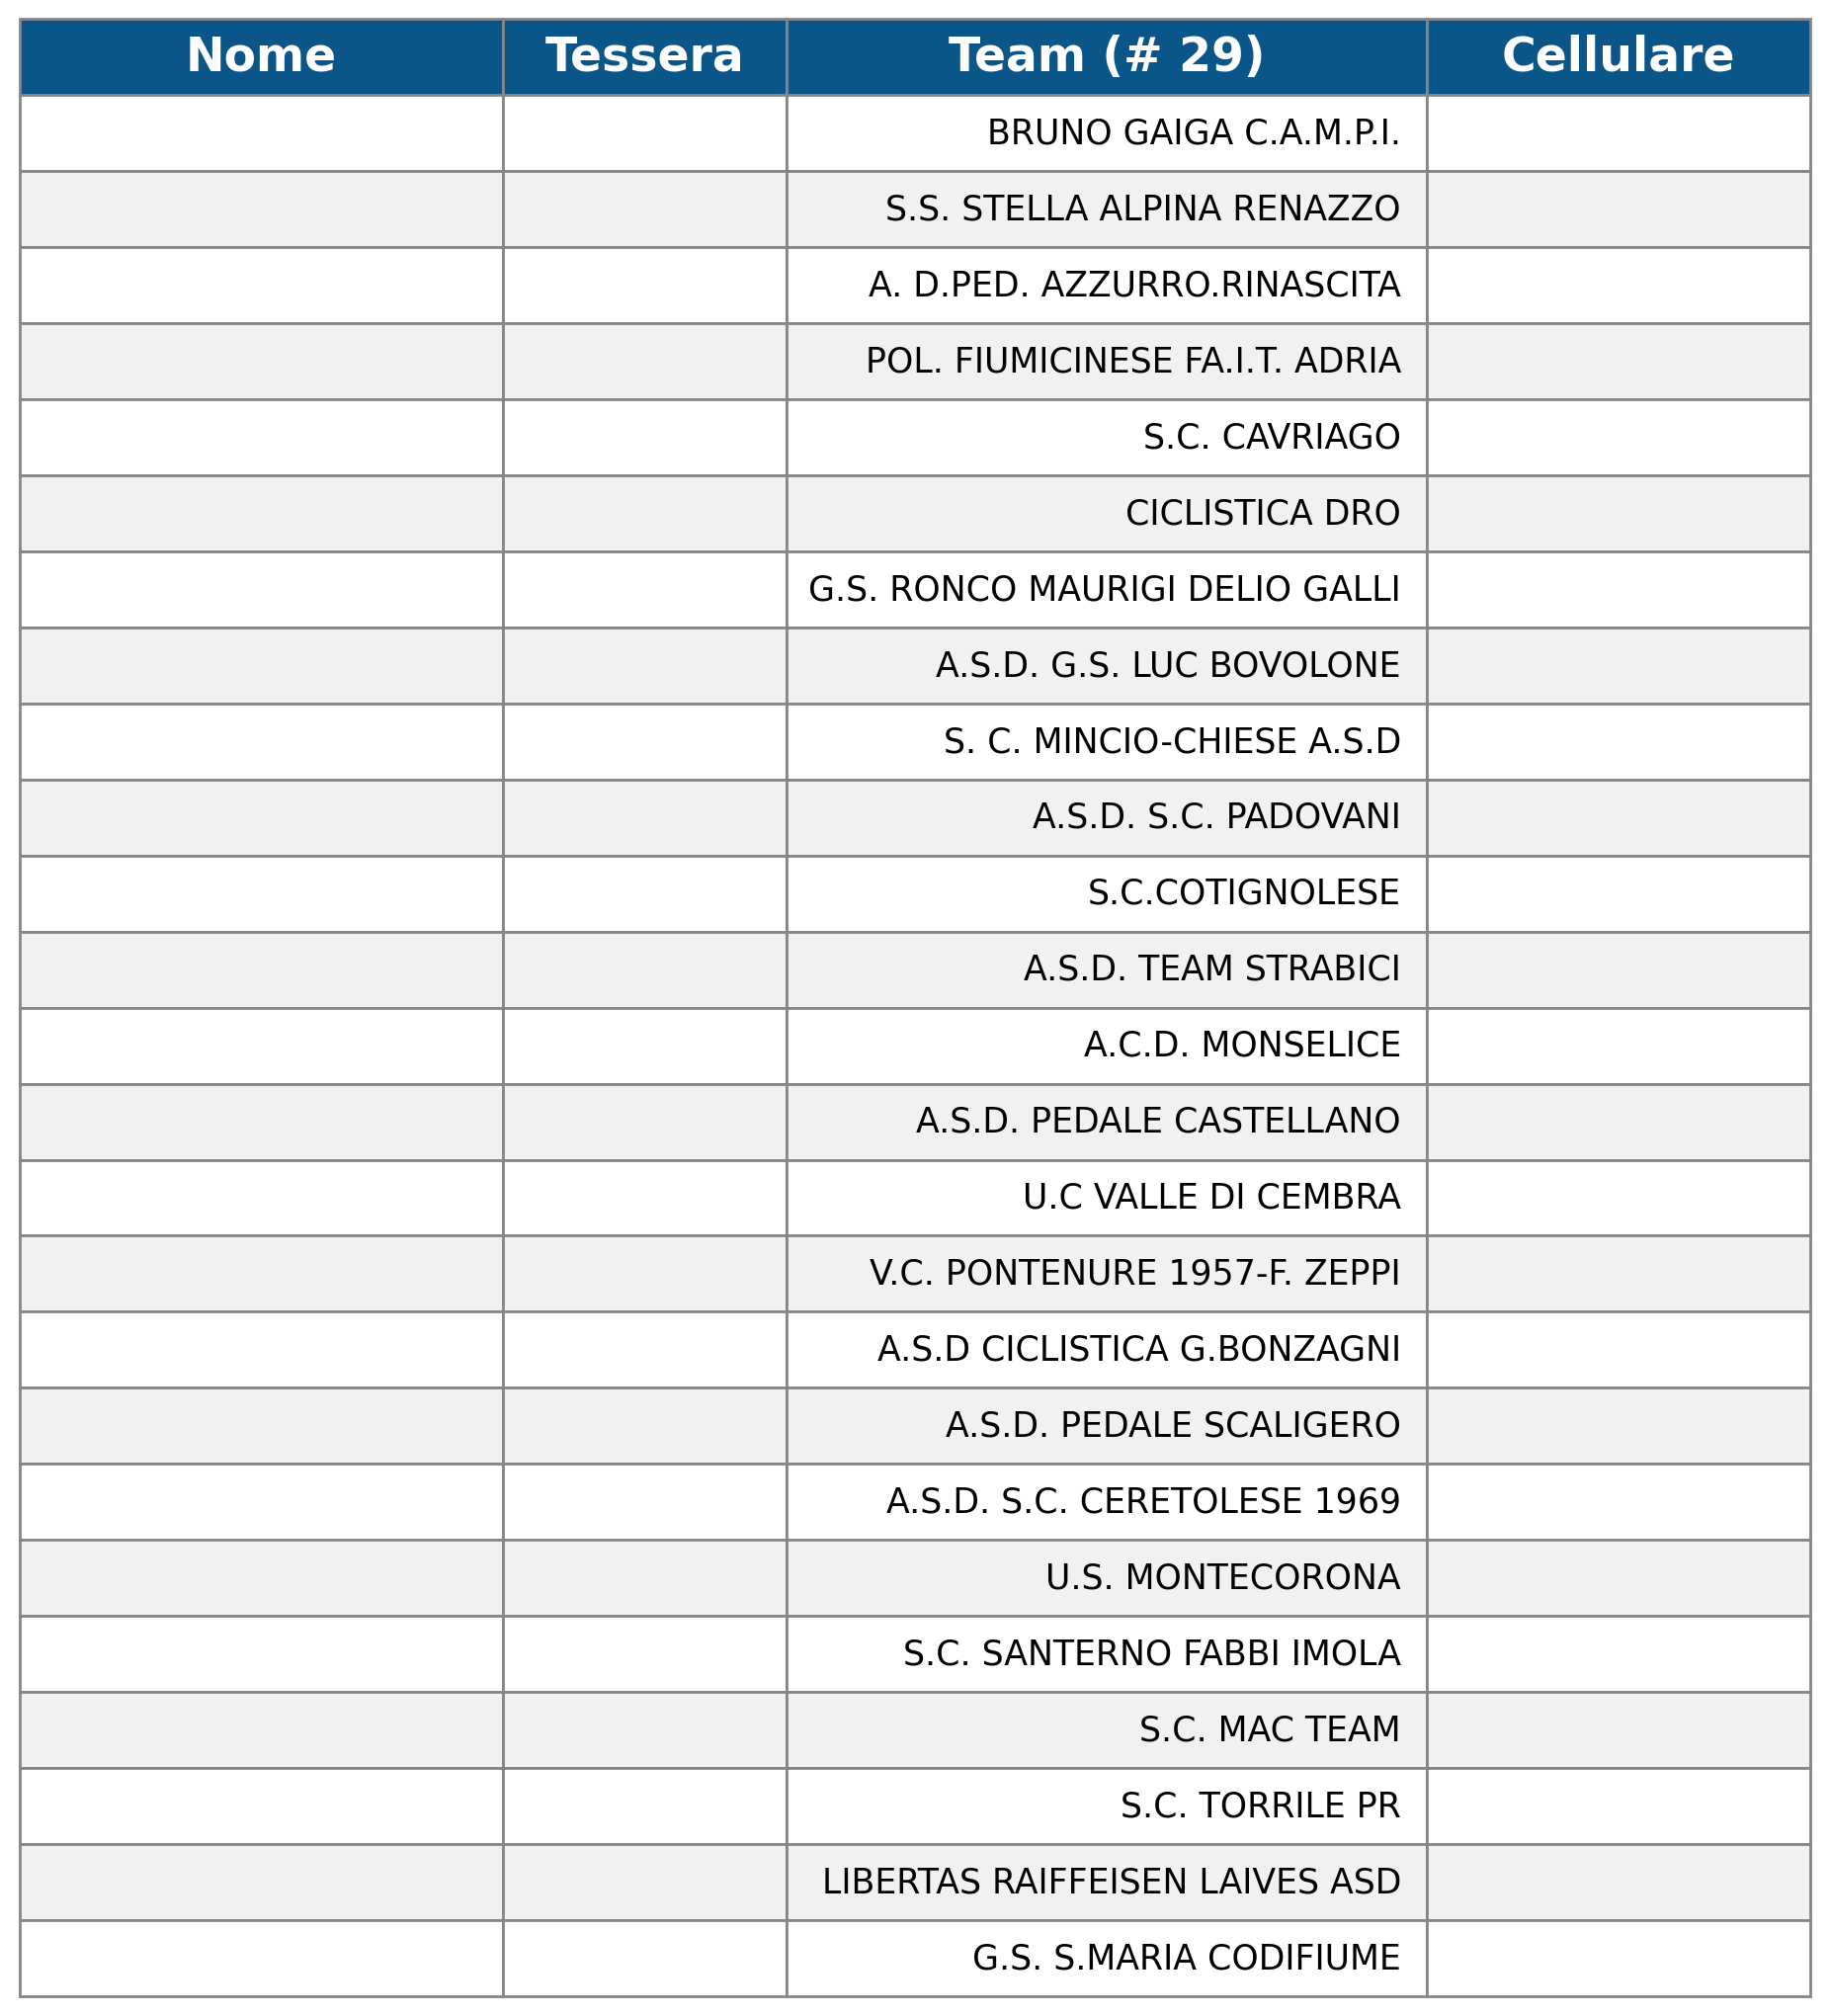

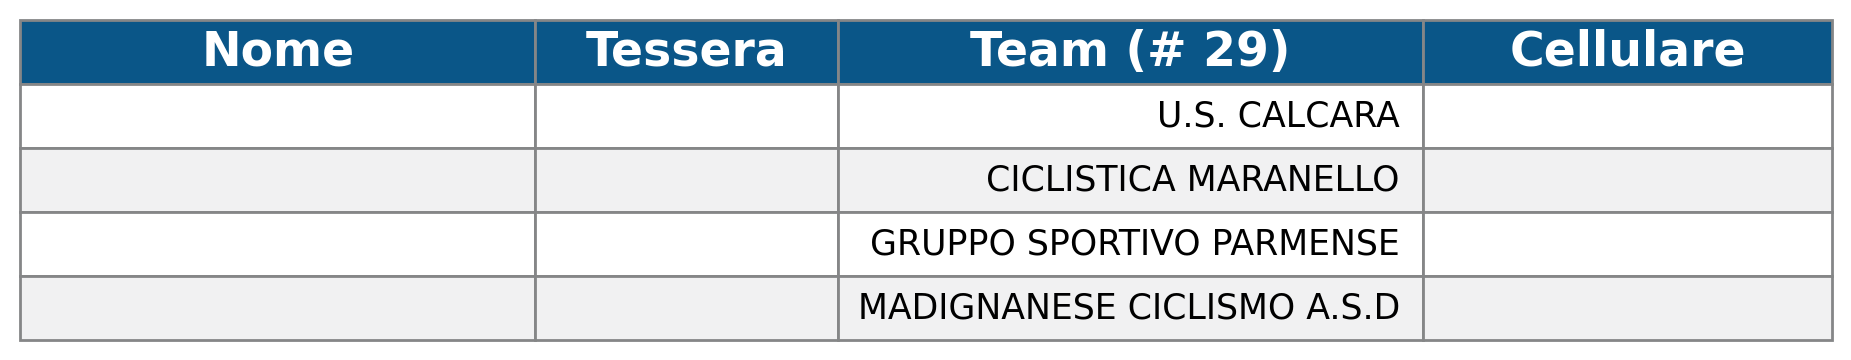

In [115]:


def generate_table(df, fname):
    edge_color      = '#858687'
    header_color    = '#0a5688'
    row_colors      = ['#f1f1f2', 'w']
    row_height      = 0.53
    # colWidths       = [0.27, 0.17, 0.05, 0.26, 0.05, 0.20]
    colWidths       = [0.29, 0.17, 0.31, 0.23]

    fig, ax = plt.subplots(figsize=(11.69, len(df)*row_height), dpi=200)
    ax.axis('off')
    mpl_table = ax.table(cellText=df.values, colLabels=df.columns, bbox=[0,0,1,1], colWidths=colWidths)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(12.5)
    mpl_table.auto_set_column_width(col=2)
    mpl_table.AXISPAD = 0.0005


    for k, index in enumerate(mpl_table._cells):
        cell = mpl_table._cells[index]
        cell.set_edgecolor(edge_color)
        cell.PAD = 0.04
        if index[0]==0:
            cell.set_text_props(weight='bold', color='w', size=17)
            cell.set_facecolor(header_color)        
        else:
            cell.set_facecolor(row_colors[index[0]%len(row_colors) ])

    strFile = "/home/nic/al/commissaire/tmp/{:s}.png".format(fname)
    if os.path.isfile(strFile):
        os.remove(strFile) # Opt.: os.system("rm " + strFile)
    # plt.tight_layout()
    plt.savefig(strFile,bbox_inches="tight")


N_split = 25

if N<N_split:
    generate_table(df, fname=FILENAME)

else:
    generate_table(df[:N_split], fname=FILENAME)
    generate_table(df[N_split:], fname=FILENAME+"_2")



## Genera .pdf

In [116]:
def create_letterhead(pdf, WIDTH):
    pdf.image("resources/headerRegionale.png", 0, 8, WIDTH)

def create_title(pdf, title):
    pw = pdf.w - 2*pdf.l_margin
    pdf.set_font('Helvetica', 'b', 14)  
    pdf.ln(35)
    pdf.cell(pw, 0, title, 0, 0, 'C')
    pdf.ln(8)

def create_subtitle(pdf, title):
    pw = pdf.w - 2*pdf.l_margin
    pdf.set_font('Helvetica', '', 14)  
    pdf.cell(pw, 0, title, 0, 0, 'C')
    pdf.ln(10)

def create_paragraph(pdf, words):
    pdf.set_text_color(r=0,g=0,b=0)
    pdf.set_font('Helvetica', '', 12)
    pdf.write(5, words)


class PDF(FPDF):

    def footer(self):
        return
        # self.set_y(-15)
        # self.set_font('Helvetica', 'I', 8)
        # self.set_text_color(128)
        # self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')


WIDTH       = 210
HEIGHT      = 297
SUBTITLE    = "ID {:d}, {:s}, {:s}, {:s}".format(idGara, LOCATION, DATE, categoria)

# Create PDF
pdf = PDF() # A4 (210 by 297 mm)
pdf.set_margins(left=10, top=10, right=-10)
pdf.add_page()

create_letterhead(pdf, WIDTH)
create_title(pdf, TITLE)
create_subtitle(pdf, SUBTITLE)

# Add table
pdf.image("tmp/{:s}.png".format(FILENAME), w=190)
pdf.ln(10)

if N>N_split:
    pdf.image("tmp/{:s}.png".format(FILENAME+"_2"), w=190)
    pdf.ln(10)


pdf.output("out/{:s}.pdf".format(FILENAME), 'F')

''

### Send to Remarkable

In [117]:
os.system("cd out/; p2r -v {:s}.pdf -p FCI/2023 --rmapi /home/nic/utils/remarkable/rmapi".format(FILENAME))
os.system("/home/nic/utils/remarkable/rmapi mv {:s} /FCI/2022/{:s}".format(FILENAME,FILENAME))

2022-10-01 14:56:14 - INFO - Starting LocalFile provider
2022-10-01 14:56:14 - INFO - Preparing PDF using crop operation
2022-10-01 14:56:15 - INFO - Processing pages ... (2/2)
2022-10-01 14:56:15 - INFO - Shrinking pdf file ...
2022-10-01 14:56:15 - INFO - Shrinking has no effect for this file, using original.
2022-10-01 14:56:15 - INFO - Starting upload to reMarkable


Refreshing tree...
WARNING!!!
  Using the new 1.5 sync, this has not been fully tested yet!!!
  Make sure you have a backup, in case there is a bug that could cause data loss!
ERROR: 2022/10/01 14:56:43 apictx.go:431: cannot send sync request failed with status 500
Refreshing tree...


2022-10-01 14:56:43 - INFO - Upload successful.
 Time 2022-03-26T09:01:53Z UCI-2-ROA-20220101
 Time 2020-12-15T23:28:07Z Transferring files using a USB cable
 Time 2021-06-06T15:49:54Z 0606_Villafontana-CReg
 Time 2022-09-09T11:59:28Z van_Son_et_al_-_The_Locations_of_Features_in_the_Mass_Distribution_of_Merging_Binary_Black_Holes_Are_Robust_Against_Uncertainties_in_the_Metallicity-Dependent_Cosmic_Star_Formation_History_2022
 Time 2022-07-30T18:37:24Z m1
 Time 2022-03-10T13:35:03Z AL
 Time 2022-09-11T06:41:05Z 0911_Valsamoggia
 Time 2022-03-10T08:28:17Z Recap
 Time 2021-09-14T07:07:18Z ONSCI
 Time 2021-08-29T08:40:24Z 0829_ElencoDS
 Time 2021-05-12T16:54:58Z Checks
 Time 2021-09-04T13:44:17Z 0829_Formigine
 Time 2021-08-29T08:26:27Z Multmess
 Time 2022-01-26T07:56:06Z 2201.06196
 Time 2021-08-29T08:26:27Z ISAPP_CompactObjects
 Time 2021-12-08T10:55:26Z 1121_Montecchio
 Time 2022-01-26T11:26:33Z Mix
 Time 2022-09-21T10:11:25Z Leyde_et_al_-_Current_and_Future_Constraints_on_Cosmology_and

WARNING!!!
  Using the new 1.5 sync, this has not been fully tested yet!!!
  Make sure you have a backup, in case there is a bug that could cause data loss!


 Time 2022-10-01T12:56:33Z 1001_SMCarpi_AL


ERROR: 2022/10/01 14:56:49 apictx.go:431: cannot send sync request failed with status 500


0